In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

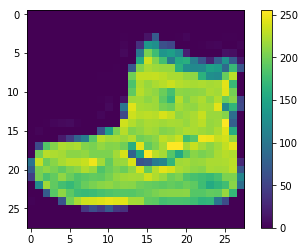

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0

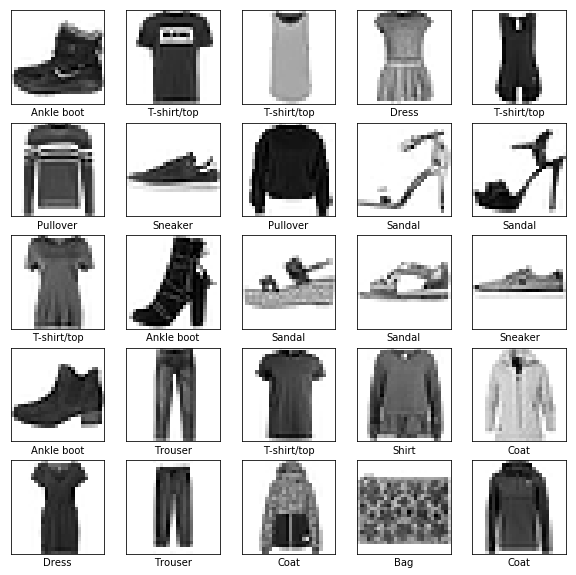

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10)
])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
model.fit(train_images, train_labels, epochs=50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 51us/sample - loss: 0.4965 - accuracy: 0.8239
Epoch 2/50
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3729 - accuracy: 0.8655
Epoch 3/50
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3338 - accuracy: 0.8785
Epoch 4/50
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3092 - accuracy: 0.8862
Epoch 5/50
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2923 - accuracy: 0.8918
Epoch 6/50
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2760 - accuracy: 0.8981
Epoch 7/50
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2639 - accuracy: 0.9022
Epoch 8/50
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2535 - accuracy: 0.9053
Epoch 9/50
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2439 - accuracy: 0.9091
Epoch 10/50
60

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.5059 - accuracy: 0.8935

Test accuracy: 0.8935


In [12]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [13]:
predictions = probability_model.predict(test_images)

In [14]:
predictions[0]

array([7.3463189e-12, 2.0961853e-24, 3.1864980e-18, 1.1472035e-26,
       6.7350099e-20, 2.6523131e-10, 1.4795419e-20, 3.8594021e-06,
       1.5682754e-14, 9.9999619e-01], dtype=float32)

In [15]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

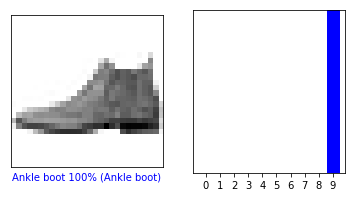

In [16]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

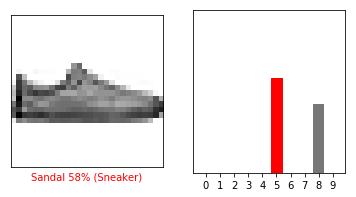

In [17]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

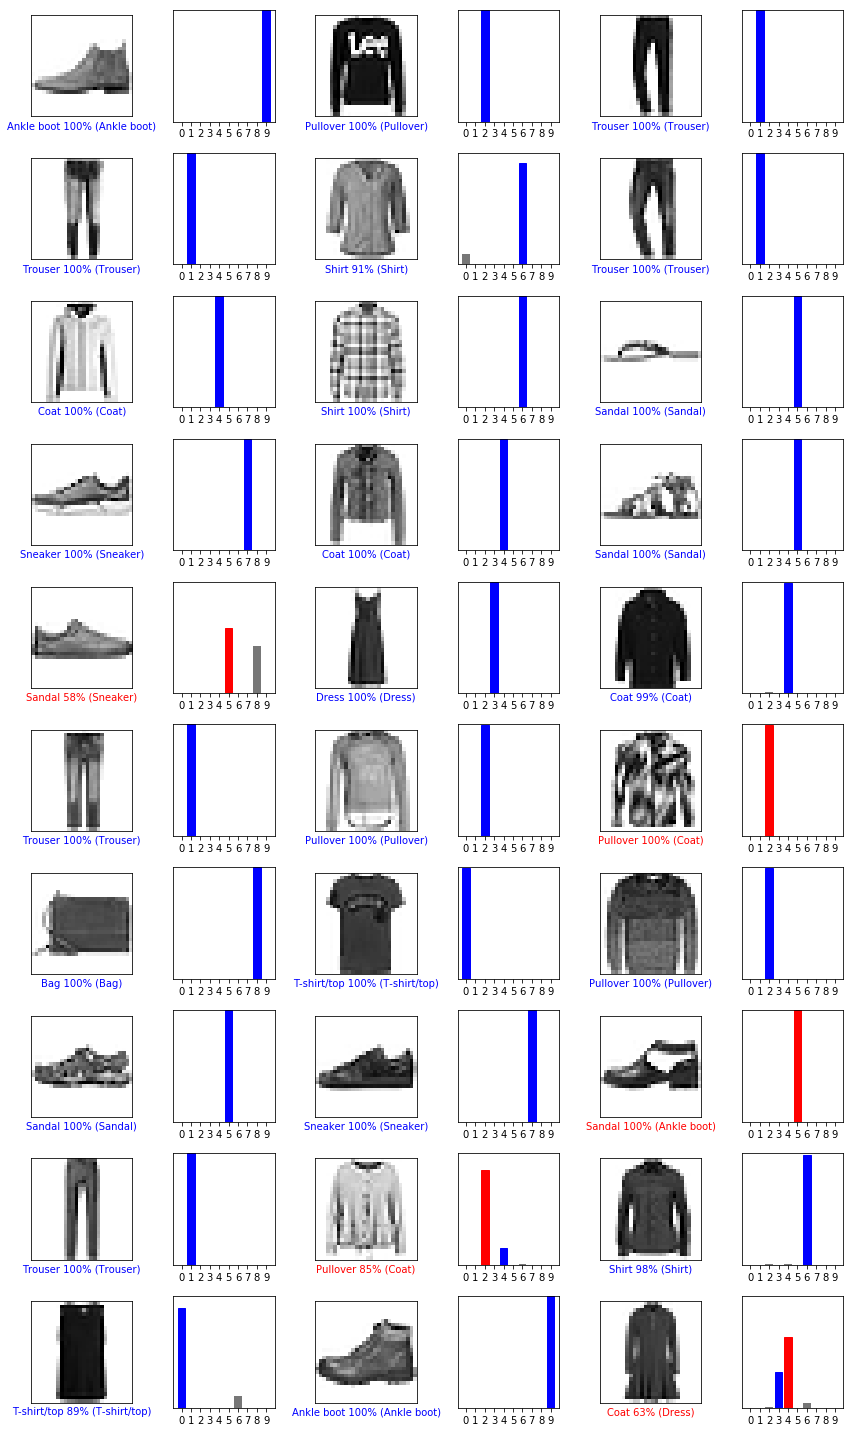

In [18]:
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()